In [17]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
from sklearn import metrics

In [21]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
exp= pd.read_csv("/home/kanisk/Desktop/Diabetes Data Science/diabetes.csv")
exp.columns = col_names

In [22]:
exp.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = exp[feature_cols] # Features
y = exp.label # Target variable

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
clf = GaussianNB()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7922077922077922


In [29]:
print("F1-Score:",metrics.f1_score(y_test,y_pred))

F1-Score: 0.6799999999999999


In [30]:
print("Confusion Matrix",metrics.confusion_matrix(y_test,y_pred))

Confusion Matrix [[88 11]
 [21 34]]


In [31]:
print("Full Report",metrics.classification_report(y_test,y_pred))

Full Report               precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.62      0.68        55

   micro avg       0.79      0.79      0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



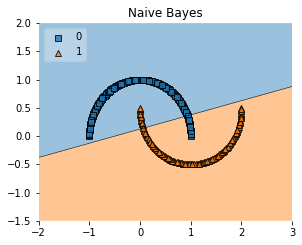

In [32]:
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions



from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, random_state=100)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Naive Bayes']
for clf, lab, grd in zip([clf],labels,itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()